In [1]:
w1,w2,w3=0.3,0.2,0.5

In [2]:
kanto_temp=73
kanto_rainfall=67
kanto_humidity=43

In [3]:
kanto_yield_apples=w1*kanto_temp+w2*kanto_rainfall+w3*kanto_humidity
kanto_yield_apples

56.8

In [4]:
print(f"The expected yied of apples in kanto region is {kanto_yield_apples} tones per hectare")

The expected yied of apples in kanto region is 56.8 tones per hectare


In [5]:
kanto=[73,67,43]
johto=[91,88,64]
hoenn=[87,134,58]
sinnoh=[102,43,37]
unova=[69,96,70]

In [6]:
weights=[w1,w2,w3]

In [7]:
def crop_yield(region,weights):
    result=0
    for x,w in zip(region,weights):
        result+=x*w
    return result

In [8]:
crop_yield(kanto,weights)

56.8

In [9]:
crop_yield(johto,weights)

76.9

In [10]:
crop_yield(unova,weights)

74.9

In [11]:
import numpy as np

In [12]:
kanto=np.array([73,67,43])

In [13]:
kanto

array([73, 67, 43])

In [14]:
weights=np.array([w1,w2,w3])

In [15]:
weights

array([0.3, 0.2, 0.5])

In [16]:
type(kanto)

numpy.ndarray

In [17]:
type(weights)

numpy.ndarray

In [18]:
weights[0]

np.float64(0.3)

In [19]:
kanto[2]

np.int64(43)

In [20]:
np.dot(kanto,weights)

np.float64(56.8)

In [21]:
help(np.dot)

Help on _ArrayFunctionDispatcher in module numpy:

dot(...)
    dot(a, b, out=None)

    Dot product of two arrays. Specifically,

    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).

    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.

    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.

    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.

    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::

        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    It uses an optimized BLAS library when possible (see `numpy.linalg`).

    Parameters
    ----------
    a : array_like
        Fir

In [22]:
(kanto*weights).sum()

np.float64(56.8)

In [23]:
arr1=list(range(1000000))
arr2=list(range(1000000,2000000))

arr1_np=np.array(arr1)
arr2_np=np.array(arr2)

In [24]:
%%time
result=0
for x1,x2 in zip(arr1,arr2):
    result+=x1*x2
result

CPU times: total: 578 ms
Wall time: 586 ms


833332333333500000

In [25]:
%%time 
np.dot(arr1_np,arr2_np)

CPU times: total: 0 ns
Wall time: 5 ms


np.int64(833332333333500000)

In [28]:
climate_data=np.array([[73,67,43],
                         [91,88,64],
                         [87,134,58],
                         [102,43,37],
                         [69,96,70]])
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

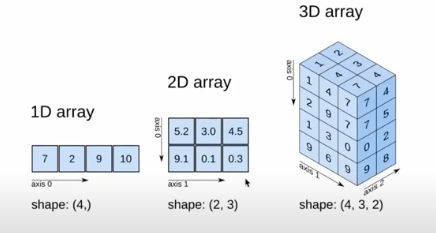

In [29]:
climate_data.shape

(5, 3)

In [30]:
weights

array([0.3, 0.2, 0.5])

In [31]:
weights.shape

(3,)

In [32]:
arr3=np.array([[[11,12,13],
                [13,14,15]],
              [[15,16,17],
               [17,18,19.5]]])
arr3

array([[[11. , 12. , 13. ],
        [13. , 14. , 15. ]],

       [[15. , 16. , 17. ],
        [17. , 18. , 19.5]]])

In [33]:
arr3.shape

(2, 2, 3)

In [34]:
weights.dtype

dtype('float64')

In [35]:
climate_data.dtype

dtype('int64')

In [36]:
arr3.dtype

dtype('float64')

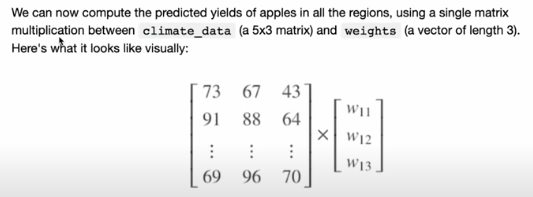

In [37]:
np.matmul(climate_data,weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [38]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [43]:
climate=np.genfromtxt("climate.txt",delimiter=",",skip_header=1)

In [44]:
climate

array([[57.88, 29.98, 22.04],
       [90.19, 54.41, 88.36],
       [32.48, 70.87, 29.57],
       ...,
       [30.32, 51.68, 63.9 ],
       [44.59, 54.93, 79.35],
       [47.49, 81.64, 51.11]])

In [45]:
climate.shape

(10000, 3)

In [46]:
weights=np.array([0.3,0.2,0.5])

In [47]:
yields=climate @ weights

In [48]:
yields

array([34.38 , 82.119, 38.703, ..., 51.382, 64.038, 56.13 ])

In [49]:
yields.shape

(10000,)

In [53]:
climate_results=np.concatenate((climate,yields.reshape(10000,1)),axis=1)

In [54]:
climate_results

array([[57.88 , 29.98 , 22.04 , 34.38 ],
       [90.19 , 54.41 , 88.36 , 82.119],
       [32.48 , 70.87 , 29.57 , 38.703],
       ...,
       [30.32 , 51.68 , 63.9  , 51.382],
       [44.59 , 54.93 , 79.35 , 64.038],
       [47.49 , 81.64 , 51.11 , 56.13 ]])

In [57]:
np.savetxt("climate_results.txt",climate_results,fmt='%.2f',header='temperature,rainfall,humidity,yield_apples',comments='')

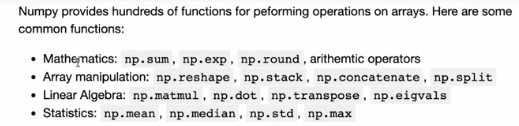

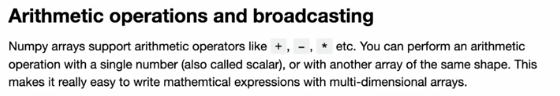

In [59]:
arr2=np.array([[1,2,3,4],
               [5,6,7,8],
               [9,1,2,3]])

In [60]:
arr3=np.array([[11,12,13,14],
               [15,16,17,18],
               [19,11,12,13]])

In [61]:
arr2+arr3

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 12, 14, 16]])

In [62]:
arr2+3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [63]:
arr3-arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [64]:
arr2/2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [65]:
arr2*arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [66]:
arr2%4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]])

In [67]:
arr2=np.array([[1,2,3,4],
              [5,6,7,8],
              [9,1,2,3]])

In [68]:
arr2.shape

(3, 4)

In [69]:
arr4=np.array([4,5,6,7])

In [70]:
arr4.shape

(4,)

In [71]:
arr2+arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

In [73]:
arr1=np.array([[1,2,3],[3,4,5]])
arr2=np.array([[2,2,3],[1,2,5]])

In [74]:
arr1==arr2

array([[False,  True,  True],
       [False, False,  True]])

In [75]:
arr1!=arr2

array([[ True, False, False],
       [ True,  True, False]])

In [76]:
arr1>=arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [77]:
arr1<=arr2

array([[ True,  True,  True],
       [False, False,  True]])

In [78]:
(arr1<=arr2).dtype

dtype('bool')

In [79]:
(arr1==arr2).sum()

np.int64(3)

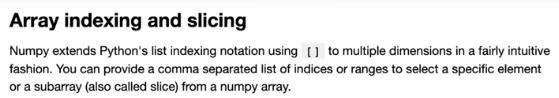

In [80]:
arr3=np.array([[[11,12,13,14],
                [13,14,15,19]],
               
               [[15,16,17,21],
                [63,92,36,18]],
               
               [[98,32,81,23],
                [17,18,19.5,43]]])

In [81]:
arr3.shape

(3, 2, 4)

In [82]:
arr3[1,1,2]

np.float64(36.0)

In [83]:
arr3[1:,0:1,:2]

array([[[15., 16.]],

       [[98., 32.]]])

In [84]:
arr3[1:,1,3]

array([18., 43.])

In [85]:
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [86]:
arr3[:2,1]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

In [87]:
arr3[1,3,2,1]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

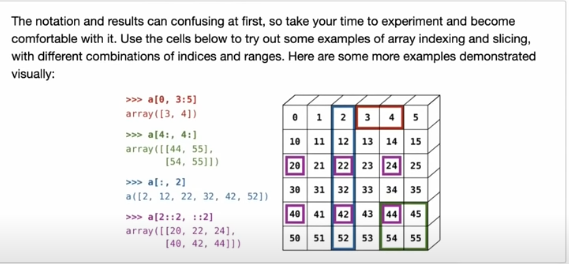

In [88]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [89]:
np.ones((2,2,3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [90]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [91]:
np.random.rand(5)

array([0.85070677, 0.46286236, 0.03222627, 0.5954191 , 0.69837779])

In [92]:
np.random.randn(2,3)

array([[ 0.8975661 ,  0.71679391, -1.32541282],
       [-0.32912731, -0.42279969, -1.29922675]])

In [93]:
np.full((2,3),42)

array([[42, 42, 42],
       [42, 42, 42]])

In [94]:
np.arange(10,90,3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [95]:
np.linspace(3,27,9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

In [96]:
np.arange(10,90,3).reshape(3,3,3)

array([[[10, 13, 16],
        [19, 22, 25],
        [28, 31, 34]],

       [[37, 40, 43],
        [46, 49, 52],
        [55, 58, 61]],

       [[64, 67, 70],
        [73, 76, 79],
        [82, 85, 88]]])